## Importing Libraries & Fetching Data

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
data = pd.read_csv('/content/spotify.csv')
df= pd.read_csv('/content/spotify.csv')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,14/7/2023
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,23/3/2023
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,30/6/2023
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,23/8/2019
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,18/5/2023


## Data Cleaning

In [147]:
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No Duplicate Rows")

No Duplicate Rows


In [148]:
print(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
Date                     0
dtype: int64

In [149]:
# Clean 'streams' column by removing non-numeric characters
data['streams'] = pd.to_numeric(data['streams'].str.replace(r'\D', '', regex=True), errors='coerce')

# Convert 'streams' to int64
data['streams'] = data['streams'].astype('int64')

In [150]:

song_name = 'Edison Lighthouse'

# Replace 'new_value' with the desired new value for 'streams'
new_value = 224608544


data.loc[data['artist(s)_name'] == song_name, 'streams'] = new_value

## Data Preprocessing

In [153]:
invalid_streams = data[~data['streams'].apply(lambda x: str(x).isdigit())]
data.drop(invalid_streams.index, inplace=True)

# convert streams to integer
data['streams'] = data['streams'].astype(int)


In [154]:
columns_to_modify = ['in_deezer_playlists', 'in_deezer_charts']

# remove commas
for col in columns_to_modify:
    data[col] = data[col].astype(str).str.replace(',', '')


## Insights

In [155]:
#Most Streamed Song
most_streamed_song = data[data['streams'] == data['streams'].max()]
most_streamed_song

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Date
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,29/11/2019


In [156]:
# top 5 most used keys
key_counts = data['key'].value_counts()
key_counts = key_counts.sort_values(ascending=False)
key_counts.head(5)

C#    120
G      96
G#     91
F      89
B      81
Name: key, dtype: int64

In [157]:
# most used mode
mode_counts = data['mode'].value_counts()

most_used_mode = mode_counts.idxmax()
print(f"The most used mode in the top songs is: {most_used_mode}")

The most used mode in the top songs is: Major


In [158]:
#  top 10 most streamed songs
top_10_streamed_songs = data.sort_values(by='streams', ascending=False).head(10)

print(top_10_streamed_songs[['track_name', 'artist(s)_name', 'streams', 'released_year']].to_string(index=False))

                                   track_name               artist(s)_name    streams  released_year
                              Blinding Lights                   The Weeknd 3703895074           2019
                                 Shape of You                   Ed Sheeran 3562543890           2017
                            Someone You Loved                Lewis Capaldi 2887241814           2018
                                 Dance Monkey                  Tones and I 2864791672           2019
Sunflower - Spider-Man: Into the Spider-Verse        Post Malone, Swae Lee 2808096550           2018
                                    One Dance          Drake, WizKid, Kyla 2713922350           2016
                    STAY (with Justin Bieber) Justin Bieber, The Kid Laroi 2665343922           2021
                                     Believer              Imagine Dragons 2594040133           2017
                                       Closer     The Chainsmokers, Halsey 2591224264      

In [166]:
# most popular songs by season

# Create a new column for season
data['season'] = data['released_month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                       'Summer' if x in [6, 7, 8] else
                                       'Autumn' if x in [9, 10, 11] else
                                       'Winter')


season_counts = data['season'].value_counts()

print(season_counts.head(10))

Spring    280
Winter    270
Autumn    209
Summer    194
Name: season, dtype: int64


## Visualization

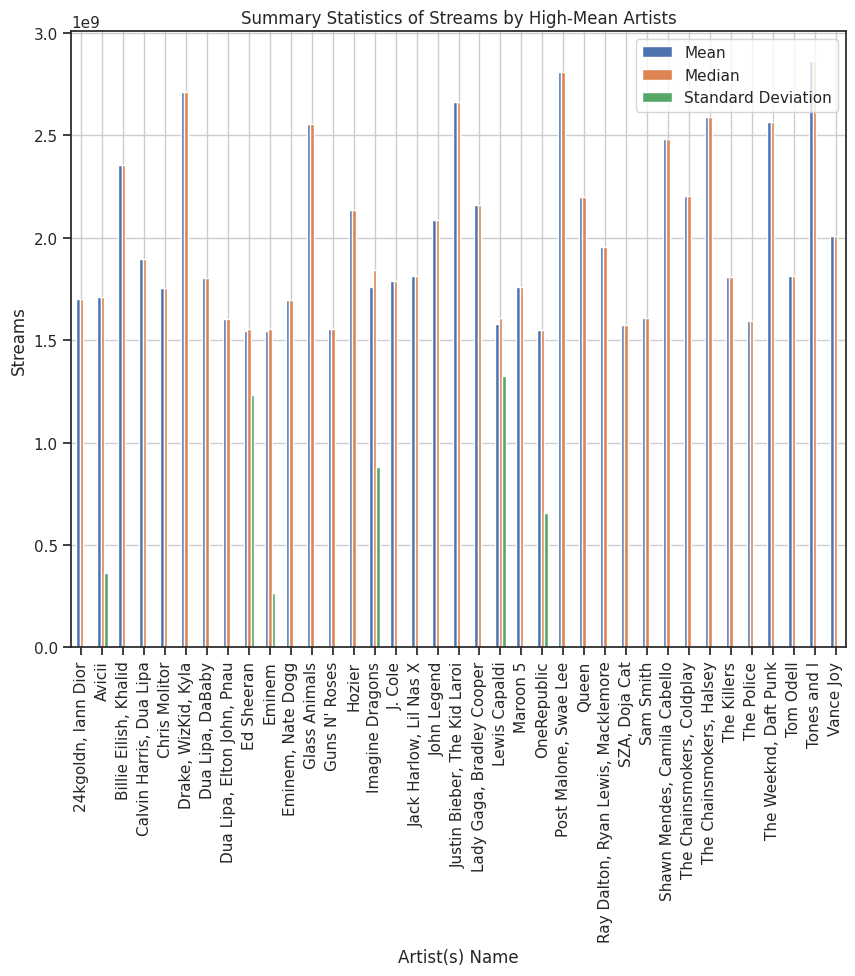

In [167]:

grouped_stats = data.groupby('artist(s)_name')['streams'].agg(['mean', 'median', 'std'])

# Filter only the artists with a mean stream value above 15 billion
high_mean_artists = grouped_stats[grouped_stats['mean'] > 1500000000]

high_mean_artists.plot(kind='bar', y=['mean', 'median', 'std'], figsize=(10, 8), grid=True)
plt.title('Summary Statistics of Streams by High-Mean Artists')
plt.xlabel('Artist(s) Name')
plt.ylabel('Streams')
plt.legend(["Mean", "Median", "Standard Deviation"])
plt.show()

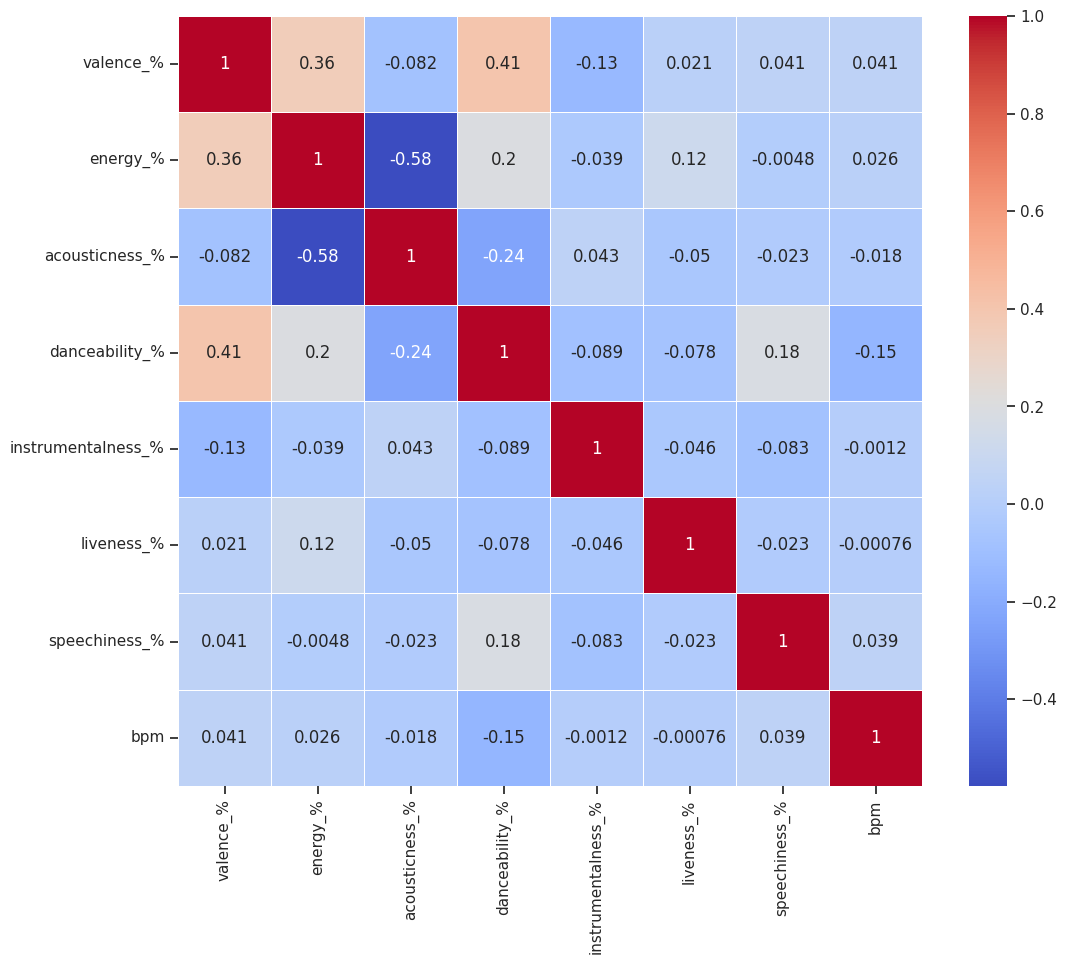

In [168]:
# Correlation matrix heatmap
features = data[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

corr_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

<ipython-input-169-5e8d290c301c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mode', y='streams', data=data, palette='viridis', errorbar=None)


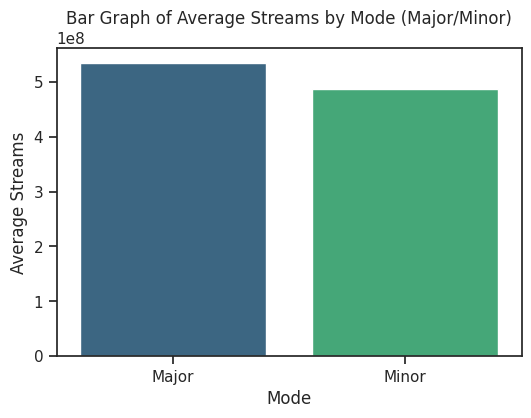

In [169]:
plt.figure(figsize=(6, 4))
sns.barplot(x='mode', y='streams', data=data, palette='viridis', errorbar=None)
plt.title('Bar Graph of Average Streams by Mode (Major/Minor)')
plt.xlabel('Mode')
plt.ylabel('Average Streams')
plt.show()


<ipython-input-170-9853110870ca>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='key', y='streams', data=data, ci=None)


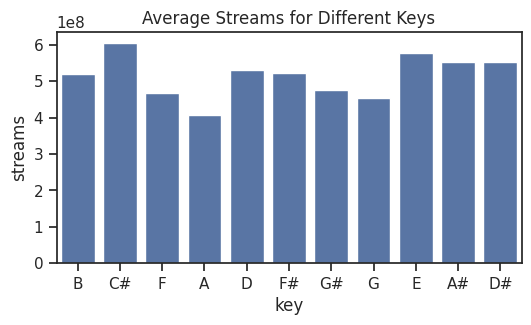

In [170]:
plt.figure(figsize=(6, 3))
sns.barplot(x='key', y='streams', data=data, ci=None)
plt.title('Average Streams for Different Keys')
plt.show()

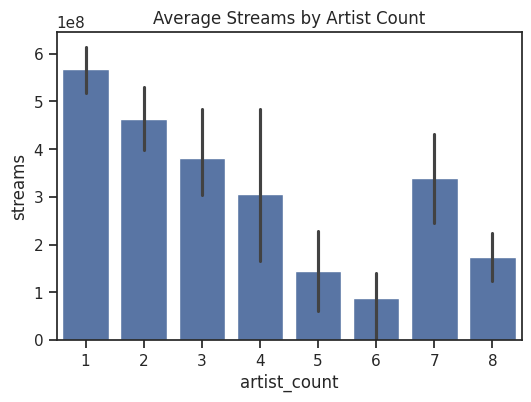

In [171]:
plt.figure(figsize=(6, 4))
sns.barplot(x='artist_count', y='streams', data=data)
plt.title('Average Streams by Artist Count')
plt.show()


<ipython-input-172-206ee4ea0087>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


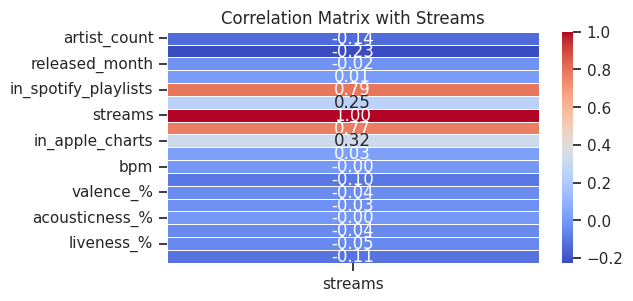

In [172]:
plt.figure(figsize=(6, 3))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['streams']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Streams')
plt.show()


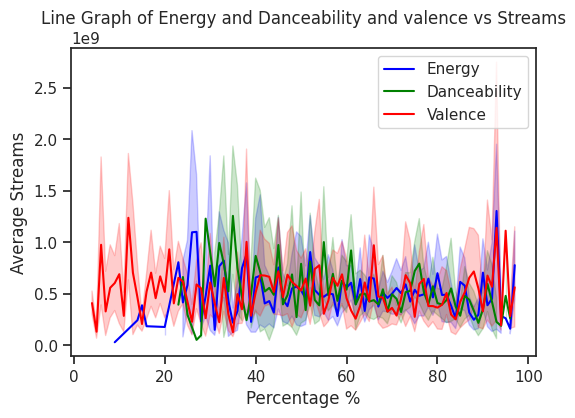

In [173]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='energy_%', y='streams', data=data, label='Energy', color='blue')
sns.lineplot(x='danceability_%', y='streams', data=data, label='Danceability', color='green')
sns.lineplot(x='valence_%', y='streams', data=data, label='Valence', color='red')
plt.title('Line Graph of Energy and Danceability and valence vs Streams')
plt.xlabel('Percentage %')
plt.ylabel('Average Streams')
plt.legend()
plt.show()

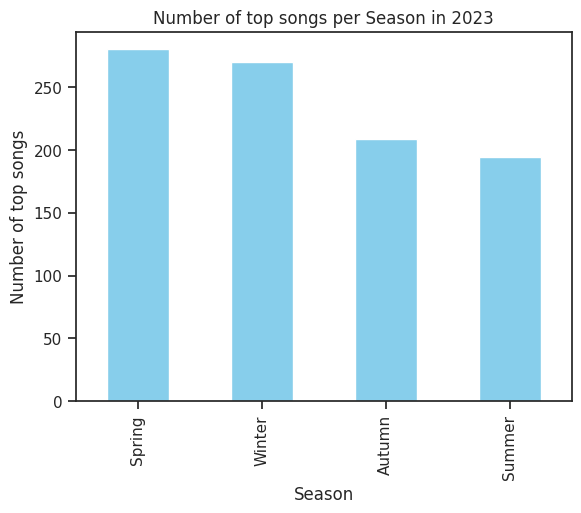

In [174]:
# Create a bar graph to show the number of streams for each season
season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of top songs')
plt.title('Number of top songs per Season in 2023')
plt.show()

## Linear regression model

In [175]:
from sklearn.linear_model import LinearRegression
target = 'streams'
features = ['danceability_%','valence_%','energy_%','speechiness_%','bpm','liveness_%','in_spotify_playlists'
,'in_apple_playlists','in_spotify_charts','in_apple_charts','in_deezer_playlists','in_deezer_charts','artist_count','released_year']

X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X,y)

print(model.coef_) # print coefficients
print(model.score(X,y)) # R-squared

[-9.09627752e+05 -2.80767293e+05 -1.95195781e+06 -1.04532115e+06
 -1.39765585e+05  3.67440516e+05  3.56027088e+04  2.93459968e+06
  3.47846063e+06 -4.37610737e+05 -2.42066086e+03 -6.09283341e+06
 -3.47501449e+07  3.51167365e+06]
0.7348428941265032


***Danceability: -9.09***

A 1 unit increase in danceability % is associated with a 905,000 decrease in streams, holding other variables constant

**Valence: -2.80**

A 1 unit increase in valence % is associated with a 284,000 decrease in streams, holding other variables constant

**Energy: -1.95**

A 1 unit increase in energy % is associated with a 1.96 million decrease in streams, holding other variables constant

**Speechiness: -1.04**

A 1 unit increase in speechiness % is associated with a 1.04 million decrease in streams, holding other variables constant

**Playlist Metrics:**

**In Spotify playlists**: Positive coefficients - being on more playlists associated with higher streams

**In Apple playlists**: Positive coefficient

**In charts**: Positive coefficients

**Artist count: -6.10**

Each additional artist on track associated with a 6.1 million decrease in streams

**Released Year: 3.5**

More recently released tracks associated with higher streams

**R-squared: 0.735**

This model explains 73.5% of the variance in streams,